In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import dataset, distance, error, find, historical, split
np.seterr('raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

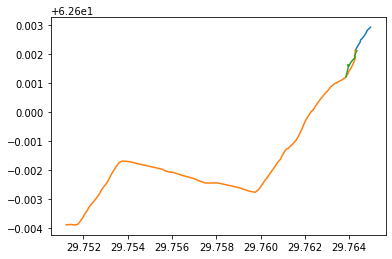

1228.617344478807
115.59585710723047


In [2]:
target_trajectory, data = dataset.load_users_trajectories_with_target(898, 1393786760018)
head, tail = split.split_trajectory_with_overlap(target_trajectory, 0.75)

head_x, head_y = head[:, 0], head[:, 1]
tail_x, tail_y = tail[:, 0], tail[:, 1]

prediction = historical.predict_by_picking_random_tail(data, head, 60)
pred_x, pred_y = prediction[:, 0], prediction[:, 1]

head_x, head_y = head_x[-10:], head_y[-10:]
plt.plot(head_y, head_x)
plt.plot(tail_y, tail_x)
plt.plot(pred_y, pred_x)
plt.show()

print(distance.calculate_trajectory_length_in_meters(tail))
print(distance.calculate_trajectory_length_in_meters(prediction))

In [3]:
THRESHOLD = 10 # meters
findings = find.find_point_overlapping_trajectories(data, head[-1], THRESHOLD)

print(len(findings))

8


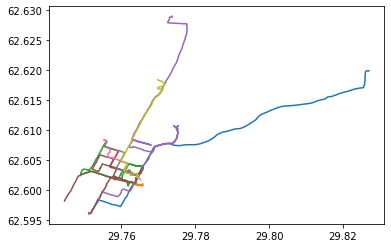

In [4]:
target_x, target_y = target_trajectory[:, 0], target_trajectory[:, 1]
plt.plot(target_y, target_x)

for f in findings:
    x, y = f[:, 0], f[:, 1]
    plt.plot(y, x)
plt.show()

In [5]:
SECONDS = 60 # 1 minute
USER_ID = 898
RATIO = 0.5
trajectory_ids = dataset.get_list_of_users_trajectory_ids(USER_ID)

errors = []
failed = 0

for trajectory_id in trajectory_ids:
    print(trajectory_id, end='')
    target_trajectory, data = dataset.load_users_trajectories_with_target(USER_ID, trajectory_id)
    head, tail = split.split_trajectory_with_overlap(target_trajectory, RATIO)
    prediction = historical.predict_by_picking_random_tail(data, head, SECONDS)

    if np.size(prediction, 0) < 2:
        failed += 1
        print(' failed')
        continue

    pred_dist = distance.calculate_trajectory_length_in_meters(prediction)

    if len(prediction) > 0 and np.size(prediction, 0) > 0 and np.size(prediction, 1) == 4 and pred_dist > 0:
        error_amount = error.calculate_error_vector(tail, prediction)[:, 4]
        errors.append(error_amount)
        print(' success', pred_dist, len(error_amount), sum(error_amount))
    else:
        failed += 1
        print(' failed')

errors_sum = list(map(sum, errors))

print(
    '\nERROR STATISTICS',
    '\naverage\t\t\t', np.average(errors_sum),
    '\nmedian\t\t\t', np.median(errors_sum),
    '\nstandard deviation\t', np.std(errors_sum),
    '\nfailed predictions\t', failed
)

1399399033400 success 95.3825653431177 5 252.7571762462079
1412515702026 success 133.33557773005919 12 195.49121591960872
1413382616849 failed
1379951571859 success 86.55188130902343 7 172.57945152670757
1379694392068 success 274.3462692375973 8 316.10679001670917
1407168712392 failed
1400436362445 success 296.2032886480431 8 378.07251641378934
1407593205810 success 234.46318396613964 7 841.0903271908073
1396953544784 success 119.24378450740605 5 161.54278830431355
1408208026280 success 358.50534363070267 8 1093.003334648575
1404054152819 success 216.21581556798048 7 197.4041091219555
1401891357857 success 314.83048388581386 7 348.9482696753271
1394042416405 success 89.34758832870354 5 228.14078531257724
1380211927794 success 73.63745472322461 5 149.89969797197676
1377681725292 success 287.26836528194326 7 308.9426843072183
1397840479593 failed
1398930716368 success 221.88446197493016 6 263.3278973469805
1396260541459 success 221.15842714532562 6 171.8754809601236
1404467994679 success

1397307370014 success 193.799866398166 6 441.5804698668012
1397315289434 success 216.0074043830386 7 377.5627169480108
1401555619182 failed
1379750070367 failed
1404064273726 success 86.44750358863732 5 221.5816620915431
1402678393735 success 42.59103267681864 4 121.63375049589715
1377788791350 failed
1404468390177 success 230.11180057830327 7 595.7660954718747
1408288153631 success 245.50755006258214 7 750.8632962035678
1411964134234 success 92.96799747103802 8 353.2023864290685
1401629100713 failed
1378655206255 success 258.20523234152324 6 308.2872984267969
1402158474401 failed
1379302234528 success 63.46831089013406 6 110.25506344244708
1412417616700 success 90.37157165304512 6 354.29573440279466
1378141680529 success 112.7022334439251 6 231.6475268448967
1404389296311 success 266.38598573635966 6 171.19446219989396
1377503869598 success 242.57105835738878 7 605.6149393166874
1405012891914 success 79.12788673051114 6 140.24715144312728
1399295150237 success 241.73406364694705 7 238